Simple TensorFlow image classification model based on [this tutorial](https://www.tensorflow.org/tutorials/images/classification).

In [1]:
# if you have to install tensorflow, idk if opencv-python is needed
# ! pip install tensorflow opencv-python

In [2]:
import tensorflow as tf

In [17]:
tf.config.list_physical_devices('GPU')

[]

In [4]:
# tf automatically labels the data based on the folder name
# and splits them into batches

batch_size = 32
img_height = 180
img_width = 180
data_dir = 'old group/algae_dataset'

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 2197 files belonging to 5 classes.
Using 1758 files for training.


In [5]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

Found 2197 files belonging to 5 classes.
Using 439 files for validation.


In [6]:
class_names = train_ds.class_names
print(class_names)

['closterium', 'microcystis', 'nitzschia', 'non-algae', 'oscillatoria']


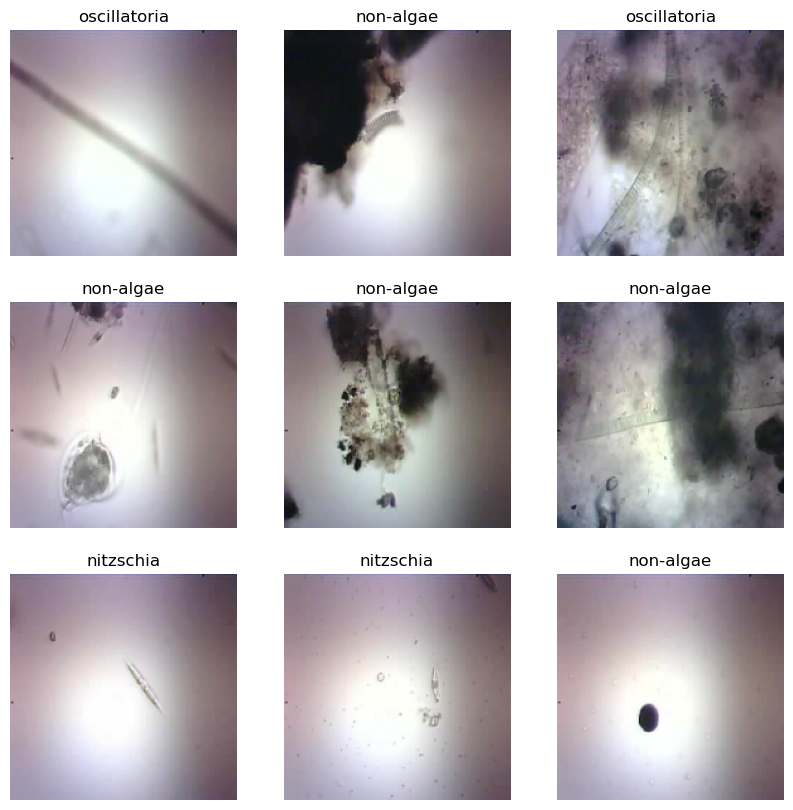

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [8]:
# this stuff allows the use of buffered prefetching to load images from disk without i/o blocking

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [9]:
# build model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Rescaling

model = Sequential()

model.add(Rescaling(1./255,  input_shape=(img_height, img_width, 3)))

# these layers are from the tutorial
model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(128, activation='relu'))

# 5 classes
model.add(Dense(5))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [11]:
# SparseCategoricalCrossentropy when there are two or more label classes

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [12]:
model.fit(train_ds, validation_data=val_ds, epochs=20)

Epoch 1/20


55/55 [==============================] - 10s 166ms/step - loss: 1.4254 - accuracy: 0.3914 - val_loss: 1.3235 - val_accuracy: 0.4123
Epoch 2/20
55/55 [==============================] - 9s 160ms/step - loss: 1.3326 - accuracy: 0.4078 - val_loss: 1.2947 - val_accuracy: 0.4533
Epoch 3/20
55/55 [==============================] - 9s 162ms/step - loss: 1.3051 - accuracy: 0.4096 - val_loss: 1.3135 - val_accuracy: 0.4601
Epoch 4/20
55/55 [==============================] - 9s 159ms/step - loss: 1.2552 - accuracy: 0.4579 - val_loss: 1.2450 - val_accuracy: 0.4214
Epoch 5/20
55/55 [==============================] - 9s 159ms/step - loss: 1.1619 - accuracy: 0.5011 - val_loss: 1.1334 - val_accuracy: 0.5080
Epoch 6/20
55/55 [==============================] - 9s 162ms/step - loss: 1.0867 - accuracy: 0.5535 - val_loss: 1.0653 - val_accuracy: 0.5535
Epoch 7/20
55/55 [==============================] - 9s 163ms/step - loss: 0.9443 - accuracy: 0.6069 - val_loss: 0.9643 - val_accuracy: 0.6082
Epoch 8/20
55/55

KeyboardInterrupt: 